In [1]:
#default_exp zero_shot_learning

In [2]:
#export
from operator import itemgetter

import numpy as np
import tqdm
import bs4
import feedparser
import seaborn as sns
import pandas as pd


from ktrain import text 
import torch


In [3]:
%cd ..

/home/kuba/Projects/pytorch_hackathon


In [4]:
pd.set_option("display.max_colwidth", 250)

In [5]:
#export
medium_publications = [
    'the-artificial-impostor',
    'pytorch',
    'dair.ai',
    'towards-artificial-intelligence',
    'swlh',
    '@ODSC',
    'doctrine',
    'paperswithcode'
]


medium_url_template = 'https://medium.com/feed/{}'
medium_url = medium_url_template.format(medium_publications[0])
medium_urls = [medium_url_template.format(publication) for publication in medium_publications]

In [6]:
#export
subreddits = [
    'MachineLearning',
    'deeplearning',
    'datascience',
    'cognitivelinguistics',
    'TopOfArxivSanity',
    'kaggle'
]

reddit_url_template = 'https://www.reddit.com/r/{}/.rss'
reddit_url = reddit_url_template.format(subreddits[0])
reddit_urls = [reddit_url_template.format(subreddit) for subreddit in subreddits]

In [7]:
#export


def get_article_text(article):
    article_html_content = article['content'][0]['value']
    article_text = bs4.BeautifulSoup(article_html_content).text
    return article_text


def get_feed_article_texts(feed):
    return [get_article_text(article) for article in feed['entries'] if 'content' in article.keys()]


def get_feed_article_df(feed):
    feed_df = pd.DataFrame.from_records(feed['entries'])
    feed_df['text'] = feed_df['summary'].apply(lambda s: bs4.BeautifulSoup(s).text)
    return feed_df

In [8]:
#export
paperswithcode_url = 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest' 
hackernews_url = 'https://news.ycombinator.com/rss' 
rss_feed_urls = [paperswithcode_url, hackernews_url] + medium_urls + reddit_urls

In [9]:
#export
def get_feed_df(feed_urls):
    feeds = [
        feedparser.parse(feed_url)
        for feed_url in tqdm.tqdm(feed_urls)
    ]
    return pd.concat(
        [
            get_feed_article_df(feed)
            for feed in feeds
            if len(feed['entries']) > 0
        ]
    )

In [10]:
feed_df = get_feed_df(rss_feed_urls)

100%|██████████| 16/16 [00:08<00:00,  1.87it/s]


In [11]:
feed_df.head()

,title,title_detail,links,link,summary,summary_detail,id,guidislink,tags,text,...,published_parsed,comments,authors,author,author_detail,updated,updated_parsed,content,href,media_thumbnail
0,I2L-MeshNet: Image-to-Lixel Prediction Network for Accurate 3D Human Pose and Mesh Estimation from a Single RGB Image,"{'type': 'text/plain', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'I2L-MeshNet: Image-to-Lixel Prediction Network for Accurate 3D Human Pose and Mesh Estimation from a Single RGB Image'}","[{'rel': 'alternate', 'type': 'text/html', 'href': 'https://paperswithcode.com/paper/i2l-meshnet-image-to-lixel-prediction-network'}]",https://paperswithcode.com/paper/i2l-meshnet-image-to-lixel-prediction-network,"Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an input image. <p>Code: <a href=""https://github.com/mks0601/I2L-MeshNet_RELEASE"">https://github.com/mks0601/I2L-MeshNet_R...","{'type': 'text/html', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an in...",https://paperswithcode.com/paper/i2l-meshnet-image-to-lixel-prediction-network,False,"[{'term': '3d hand pose estimation', 'scheme': None, 'label': None}, {'term': '3d human pose estimation', 'scheme': None, 'label': None}]",Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an input image. Code: https://github.com/mks0601/I2L-MeshNet_RELEASE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Polysemy Deciphering Network for Robust Human-Object Interaction Detection,"{'type': 'text/plain', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'Polysemy Deciphering Network for Robust Human-Object Interaction Detection'}","[{'rel': 'alternate', 'type': 'text/html', 'href': 'https://paperswithcode.com/paper/polysemy-deciphering-network-for-robust-human'}]",https://paperswithcode.com/paper/polysemy-deciphering-network-for-robust-human,"To address this issue, in this paper, we propose a novel Polysemy Deciphering Network (PD-Net) that decodes the visual polysemy of verbs for HOI detection in three distinct ways. <p>Code: <a href=""https://github.com/MuchHair/PD-Net"">https://githu...","{'type': 'text/html', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'To address this issue, in this paper, we propose a novel Polysemy Deciphering Network (PD-Net) that decodes the visual polysemy o...",https://paperswithcode.com/paper/polysemy-deciphering-network-for-robust-human,False,"[{'term': 'Human-object interaction detection', 'scheme': None, 'label': None}, {'term': 'Scene understanding', 'scheme': None, 'label': None}]","To address this issue, in this paper, we propose a novel Polysemy Deciphering Network (PD-Net) that decodes the visual polysemy of verbs for HOI detection in three distinct ways. Code: https://github.com/MuchHair/PD-Net",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cascade Graph Neural Networks for RGB-D Salient Object Detection,"{'type': 'text/plain', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'Cascade Graph Neural Networks for RGB-D Salient Object Detection'}","[{'rel': 'alternate', 'type': 'text/html', 'href': 'https://paperswithcode.com/paper/cascade-graph-neural-networks-for-rgb-d'}]",https://paperswithcode.com/paper/cascade-graph-neural-networks-for-rgb-d,"Current works either simply distill prior knowledge from the corresponding depth map for handling the RGB-image or blindly fuse color and geometric information to generate the coarse depth-aware representations, hindering the performance of RGB-D...","{'type': 'text/html', 'language': None, 'base': 'https://us-east1-

In [12]:
!pwd 

/home/kuba/Projects/pytorch_hackathon


In [13]:
!ls 

docs		 Makefile~	    pytorch_hackathon.egg-info	settings.ini~
feed_topics.csv  models		    README.md			setup.py
github_search	 notebooks	    requirements.txt		streamlit
Makefile	 pytorch_hackathon  settings.ini


In [14]:
zsl_clf = text.ZeroShotClassifier(device='cuda')

In [15]:
zsl_clf 

In [16]:
example_article = feed_df.iloc[0]
example_article_text = example_article['text']

In [17]:
#export
topic_strings = [
    'deep learning',
    'natural language processing',
    'computer vision',
    'visualization',
    'industry',
    'implementation',
    'computer programming',
    'reddit question',
    'research',
    'startup'
]

In [18]:
zsl_clf.model

BartForSequenceClassification(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): LearnedPositionalEmbedding(1026, 1024, padding_idx=1)
      (layers): ModuleList(
        (0): EncoderLayer(
          (self_attn): SelfAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=T

In [19]:
feed_df.shape

(295, 21)

In [20]:
#export

def get_zero_shot_classification_results(zsl_clf, text, topic_strings, max_length=128, sort=True):
    results = zsl_clf.predict(text, topic_strings=topic_strings, include_labels=True, batch_size=len(topic_strings), max_length=max_length)
    if sort:
        return sorted(results, key=itemgetter(1), reverse=True)
    else:
        return results


def get_zero_shot_classification_results_df(zsl_clf, texts, topic_strings):
    results_df = pd.DataFrame(np.zeros((len(texts), len(topic_strings))), columns=sorted(topic_strings))
    for i, text in enumerate(tqdm.tqdm(texts)):
        results = get_zero_shot_classification_results(zsl_clf, text, topic_strings)
        results_df.iloc[i] = pd.Series(dict(sorted(results, key=itemgetter(0))))
    return results_df

In [21]:
results = get_zero_shot_classification_results(zsl_clf, example_article_text, topic_strings)
results = sorted(results, key=itemgetter(1), reverse=True)

In [22]:
pd.Series(dict(results))

computer programming           0.724514
research                       0.703937
computer vision                0.663395
visualization                  0.287664
deep learning                  0.113755
startup                        0.035245
implementation                 0.019770
industry                       0.016407
reddit question                0.007256
natural language processing    0.000321
dtype: float64

In [23]:
results_df = get_zero_shot_classification_results_df(
    zsl_clf,
    feed_df['text'],
    topic_strings
)

100%|██████████| 295/295 [00:53<00:00,  5.48it/s]


In [24]:
feed_df[['text']].shape

(295, 1)

In [25]:
feed_df

,title,title_detail,links,link,summary,summary_detail,id,guidislink,tags,text,...,published_parsed,comments,authors,author,author_detail,updated,updated_parsed,content,href,media_thumbnail
0,I2L-MeshNet: Image-to-Lixel Prediction Network for Accurate 3D Human Pose and Mesh Estimation from a Single RGB Image,"{'type': 'text/plain', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'I2L-MeshNet: Image-to-Lixel Prediction Network for Accurate 3D Human Pose and Mesh Estimation from a Single RGB Image'}","[{'rel': 'alternate', 'type': 'text/html', 'href': 'https://paperswithcode.com/paper/i2l-meshnet-image-to-lixel-prediction-network'}]",https://paperswithcode.com/paper/i2l-meshnet-image-to-lixel-prediction-network,"Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an input image. <p>Code: <a href=""https://github.com/mks0601/I2L-MeshNet_RELEASE"">https://github.com/mks0601/I2L-MeshNet_R...","{'type': 'text/html', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an in...",https://paperswithcode.com/paper/i2l-meshnet-image-to-lixel-prediction-network,False,"[{'term': '3d hand pose estimation', 'scheme': None, 'label': None}, {'term': '3d human pose estimation', 'scheme': None, 'label': None}]",Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an input image. Code: https://github.com/mks0601/I2L-MeshNet_RELEASE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Polysemy Deciphering Network for Robust Human-Object Interaction Detection,"{'type': 'text/plain', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'Polysemy Deciphering Network for Robust Human-Object Interaction Detection'}","[{'rel': 'alternate', 'type': 'text/html', 'href': 'https://paperswithcode.com/paper/polysemy-deciphering-network-for-robust-human'}]",https://paperswithcode.com/paper/polysemy-deciphering-network-for-robust-human,"To address this issue, in this paper, we propose a novel Polysemy Deciphering Network (PD-Net) that decodes the visual polysemy of verbs for HOI detection in three distinct ways. <p>Code: <a href=""https://github.com/MuchHair/PD-Net"">https://githu...","{'type': 'text/html', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'To address this issue, in this paper, we propose a novel Polysemy Deciphering Network (PD-Net) that decodes the visual polysemy o...",https://paperswithcode.com/paper/polysemy-deciphering-network-for-robust-human,False,"[{'term': 'Human-object interaction detection', 'scheme': None, 'label': None}, {'term': 'Scene understanding', 'scheme': None, 'label': None}]","To address this issue, in this paper, we propose a novel Polysemy Deciphering Network (PD-Net) that decodes the visual polysemy of verbs for HOI detection in three distinct ways. Code: https://github.com/MuchHair/PD-Net",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cascade Graph Neural Networks for RGB-D Salient Object Detection,"{'type': 'text/plain', 'language': None, 'base': 'https://us-east1-ml-feeds.cloudfunctions.net/pwc/latest', 'value': 'Cascade Graph Neural Networks for RGB-D Salient Object Detection'}","[{'rel': 'alternate', 'type': 'text/html', 'href': 'https://paperswithcode.com/paper/cascade-graph-neural-networks-for-rgb-d'}]",https://paperswithcode.com/paper/cascade-graph-neural-networks-for-rgb-d,"Current works either simply distill prior knowledge from the corresponding depth map for handling the RGB-image or blindly fuse color and geometric information to generate the coarse depth-aware representations, hindering the performance of RGB-D...","{'type': 'text/html', 'language': None, 'base': 'https://us-east1-

In [41]:
feed_df[['title', 'summary', 'link']].reset_index().join(results_df).to_csv('feed_topics.csv', index=False)

In [27]:
example_article[['title', 'text']]

title                                                                               I2L-MeshNet: Image-to-Lixel Prediction Network for Accurate 3D Human Pose and Mesh Estimation from a Single RGB Image
text     Most of the previous image-based 3D human pose and mesh estimation methods estimate parameters of the human mesh model from an input image. Code: https://github.com/mks0601/I2L-MeshNet_RELEASE
Name: 0, dtype: object

In [28]:
categories = [c for c, __ in results]
scores = [score for __, score in results]

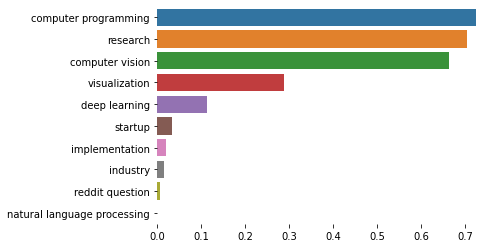

In [29]:
sns.barplot(scores, categories)
sns.despine(left=True, bottom=True)